<a href="https://colab.research.google.com/github/deepsharma26/SIRT-isoform_selective-/blob/main/DCCM_plots_for_C_alpha_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dynamic Cross Correlation Matrix (DCCM) for C-alpha atoms only

This analysis helps in identification of residue-residue correlation thorughout the simulation period.

In [ ]:
pip install MDAnalysis numpy matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.5 MB/s eta 0:00:00


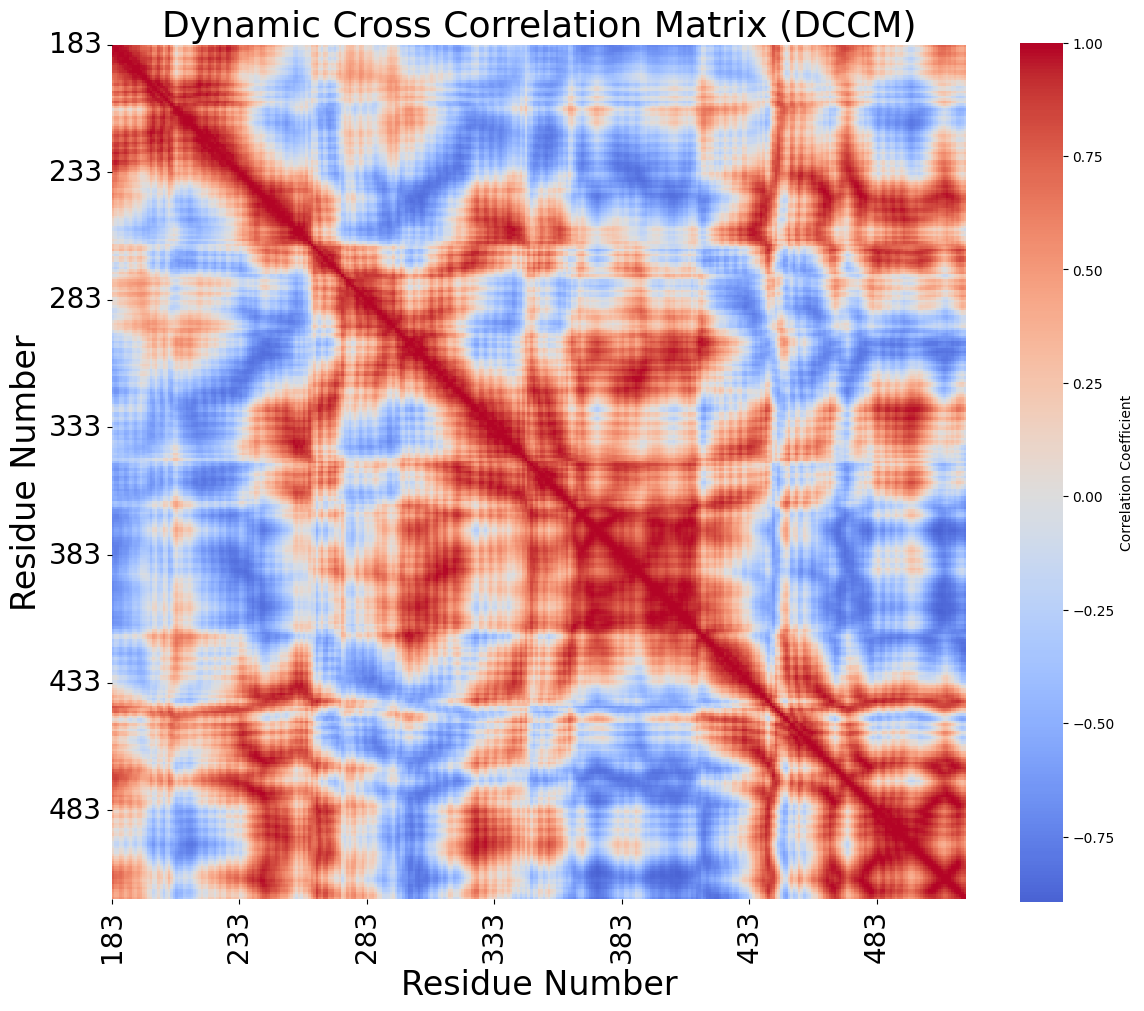

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load trajectory and topology
u = mda.Universe("CA_only.pdb", "CA_only.xtc") #CA_only.pdb and CA_only.xtc files are genrated using gromacs command lines.Replace this with your input file each time.
calphas = u.select_atoms("name CA")

# Get residue numbers
resids = [res.resid for res in calphas.residues]

# Store fluctuation data
n_frames = len(u.trajectory)
n_atoms = len(calphas)
positions = np.zeros((n_frames, n_atoms, 3))

for i, ts in enumerate(u.trajectory):
    positions[i] = calphas.positions

# Subtract mean positions
mean_pos = positions.mean(axis=0)
fluctuations = positions - mean_pos

# Compute correlation matrix
C = np.zeros((n_atoms, n_atoms))

for i in range(n_atoms):
    for j in range(n_atoms):
        xi = fluctuations[:, i, :]
        xj = fluctuations[:, j, :]
        num = np.sum(np.sum(xi * xj, axis=1))
        denom = np.sqrt(np.sum(np.sum(xi * xi, axis=1)) * np.sum(np.sum(xj * xj, axis=1)))
        C[i, j] = num / denom

# Set ticks every 50 residues
tick_interval = 50
tick_locations = np.arange(0, n_atoms, tick_interval)
tick_labels = [resids[i] for i in tick_locations]

# Plot DCCM with sparse, readable labels
plt.figure(figsize=(12, 10))
sns.heatmap(C, cmap='coolwarm', center=0, square=True,
            xticklabels=tick_labels, yticklabels=tick_labels,
            cbar_kws={"label": "Correlation Coefficient"})

plt.title("Dynamic Cross Correlation Matrix (DCCM)", fontsize=26)
plt.xlabel("Residue Number", fontsize=24)
plt.ylabel("Residue Number", fontsize=24)
plt.xticks(tick_locations, tick_labels, rotation=90, fontsize=20)
plt.yticks(tick_locations, tick_labels, fontsize=20)
plt.tight_layout()
plt.savefig("SIRT1_apo_dccm.png", dpi=300)
plt.show()
